In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [65]:
df = pd.read_csv("Cleaned_BRCA.csv")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           334 non-null    object 
 1   Age                  334 non-null    int64  
 2   Gender               334 non-null    object 
 3   Protein1             334 non-null    float64
 4   Protein2             334 non-null    float64
 5   Protein3             334 non-null    float64
 6   Protein4             334 non-null    float64
 7   Tumour_Stage         334 non-null    object 
 8   Histology            334 non-null    object 
 9   ER status            334 non-null    object 
 10  PR status            334 non-null    object 
 11  HER2 status          334 non-null    object 
 12  Surgery_type         334 non-null    object 
 13  Date_of_Surgery      334 non-null    object 
 14  Date_of_Last_Visit   334 non-null    object 
 15  Patient_Status       334 non-null    obj

In [67]:
df.shape

(334, 18)

In [68]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Tumor_Stage_Numeric,Year_of_Surgery
0,TCGA-D8-A1XD,36,FEMALE,0.080,0.426,0.547,0.274,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive,3,2017
1,TCGA-EW-A1OX,43,FEMALE,-0.420,0.578,0.614,-0.032,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead,2,2017
2,TCGA-A8-A079,69,FEMALE,0.214,1.311,-0.327,-0.234,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive,3,2017
3,TCGA-D8-A1XR,56,FEMALE,0.345,-0.211,-0.193,0.124,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive,2,2017
4,TCGA-BH-A0BF,56,FEMALE,0.222,1.907,0.520,-0.312,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,Dead,2,2017


In [69]:
df.describe(include=object)

,Patient_ID,Gender,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
count,334,334,334,334,334,334,334,334,334,334,334
unique,334,2,3,3,1,1,2,4,181,286,3
top,TCGA-D8-A1XD,FEMALE,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-06,1900-01-01,Alive
freq,1,330,189,233,334,334,305,105,5,17,255


In [70]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4,Tumor_Stage_Numeric,Year_of_Surgery
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029982,0.946883,-0.090198,0.009805,2.050898,2018.179641
std,12.961212,0.563602,0.911671,0.585196,0.629067,0.657904,0.717063
min,29.000000,-2.341000,-0.979000,-1.627000,-2.026000,1.000000,2017.000000
25%,49.000000,-0.359250,0.362250,-0.514000,-0.377000,2.000000,2018.000000
50%,58.000000,0.006500,0.992500,-0.173000,0.042000,2.000000,2018.000000
75%,68.000000,0.343500,1.627750,0.278250,0.425750,2.000000,2019.000000
max,90.000000,1.594000,3.402000,2.193000,1.630000,3.000000,2019.000000


In [71]:
df.duplicated().sum()

0

In [72]:
# prompt: change the Date_of_Last_Visit that equal to 1/1/1900 to according to the Date_of_Surgery

df.loc[df['Date_of_Last_Visit'] == '1/1/1900', 'Date_of_Last_Visit'] = df.loc[df['Date_of_Last_Visit'] == '1/1/1900', 'Date_of_Surgery']

In [73]:
df[df['Date_of_Last_Visit']=='1/1/1900']

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Tumor_Stage_Numeric,Year_of_Surgery


In [108]:
df.loc[df['Date_of_Last_Visit'] == '5/3/2026', 'Date_of_Last_Visit'] = '5/3/2018'
df.loc[df['Date_of_Last_Visit'] == '9/24/2026', 'Date_of_Last_Visit'] = '9/24/2019'

In [109]:
df[df['Date_of_Last_Visit']=='5/3/2026']
df[df['Date_of_Last_Visit']=='9/24/2026']

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Tumor_Stage_Numeric,Year_of_Surgery,Time_Difference


In [74]:
df_co = df[['Age','Protein1','Protein2','Protein3','Protein4','Tumor_Stage_Numeric']]
cor = df_co.corr()
text = np.round(cor.values, 2).astype(str)
fig = go.Figure(data=go.Heatmap(
    z = cor.values,
    x = cor.columns,
    y=cor.columns,
    zmin = -1 , zmax = 1,
    colorscale='blues',
    colorbar=dict(title="Correlation"),
    text=text
))
fig.update_traces(text=text, texttemplate="%{text}", textfont_size=12)
fig.update_layout(title = "Correlation Heatmap",
                  xaxis_nticks=36)
fig.show()

In [75]:
# prompt: change the Date_of_Last_Visit that equal to 1/1/1900 to according to the Date_of_Surgery

# Find rows where Date_of_Last_Visit is 1/1/1900
rows_to_update = df['Date_of_Last_Visit'] == '1/1/1900'

# Update Date_of_Last_Visit with Date_of_Surgery for those rows
df.loc[rows_to_update, 'Date_of_Last_Visit'] = df.loc[rows_to_update, 'Date_of_Surgery']

# Verify the changes
print(df.loc[rows_to_update, ['Date_of_Last_Visit', 'Date_of_Surgery']])

Empty DataFrame
Columns: [Date_of_Last_Visit, Date_of_Surgery]
Index: []


In [76]:
# prompt: make his column chart using ploltly and dont use viridis color

fig = px.histogram(df, x='Age', color='Tumor_Stage_Numeric',
                  color_discrete_sequence=px.colors.qualitative.Vivid,
                   title='Distribution of Age by Tumor Stage')
fig.show()

In [91]:
# prompt: # prompt: using plotly give me Year_of_Surgery by Patient Status

fig = px.histogram(df, x='Year_of_Surgery', color='Patient_Status',
                  barmode='group',  # Use 'group' for side-by-side bars
                  title='Year of Surgery by Patient Status')
fig.show()

In [78]:
# prompt: pie chart show patient 's gender

# Assuming 'Gender' is a column in your DataFrame 'df'
gender_counts = df['Gender'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(gender_counts, values=gender_counts.values, names=gender_counts.index,
             title='Distribution of Patients by Gender')
fig.show()

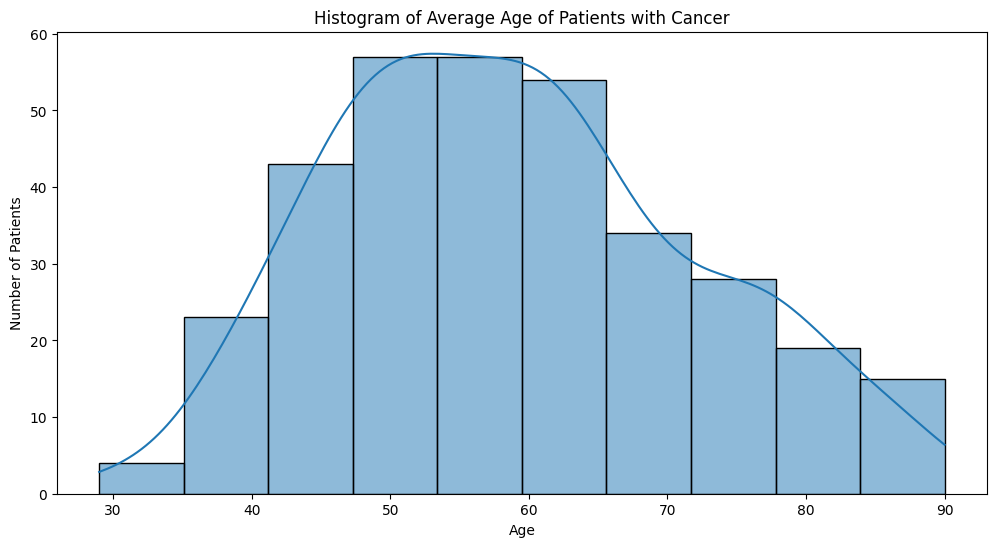

In [79]:
# prompt: Histogram show average number of patient with cancer

plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Histogram of Average Age of Patients with Cancer')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

In [80]:
# prompt: # prompt: create Bubble chart using three variabe Tumor_Stage_Numeric, Histology and Patient_Status
#  update this code to increase size of bubble fig = px.scatter(df, x="Patient_Status", y="Histology", size="Tumor_Stage_Numeric", color="Tumour_Stage",
#                  hover_name="Patient_Status", title="Bubble Chart of Tumor Stage, Histology, and Patient Status")
# fig.show()

fig = px.scatter(df, x="Patient_Status", y="Histology", size="Tumor_Stage_Numeric", color="Tumour_Stage",
                 hover_name="Patient_Status", title="Bubble Chart of Tumor Stage, Histology, and Patient Status",
                 size_max=60)  # Increase the maximum bubble size
fig.show()

In [81]:
# prompt: create bar chart using Patient_Status and HER2 status using plotly

# Create a bar chart using Plotly
fig = px.histogram(df, x="Patient_Status", color="HER2 status", barmode="group",
                   title="Patient Status vs HER2 Status")
fig.show()

In [82]:
# prompt: satcked bar chart for Surgery_type and patient_status using plotly

fig = px.histogram(df, x="Surgery_type", color="Patient_Status", barmode="stack",
                   title="Stacked Bar Chart of Surgery Type and Patient Status")
fig.show()

In [99]:
# prompt: line chart using year_of_surgury and count of patent using plotly

# Group the data by 'Year_of_Surgery' and count the number of patients
year_surgery_counts = df.groupby('Year_of_Surgery')['Patient_ID'].count().reset_index()

# Create the line chart using Plotly
fig = px.line(year_surgery_counts, x='Year_of_Surgery', y='Patient_ID',
              title='Number of Patients by Year of Surgery')
fig.update_layout(xaxis_title='Year of Surgery', yaxis_title='Number of Patients')
fig.show()

In [110]:
# prompt: make charts to difference between this two date  Date_of_Last_Visit  Date_of_Surgery,and patient status using plotly

# Convert 'Date_of_Last_Visit' and 'Date_of_Surgery' to datetime objects if they are not already
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'])
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'])

# Calculate the difference between the two dates
df['Time_Difference'] = (df['Date_of_Surgery'] - df['Date_of_Last_Visit']).dt.days

# Create a scatter plot using Plotly
fig = px.scatter(df, x='Time_Difference', y='Patient_Status', color='Patient_Status',
                 title='Difference Between Last Visit and Surgery vs Patient Status')
fig.update_layout(xaxis_title='Days Between Last Visit and Surgery',
                  yaxis_title='Patient Status')
fig.show()

# Create a box plot using Plotly
fig = px.box(df, x='Patient_Status', y='Time_Difference', color='Patient_Status',
             title='Difference Between Last Visit and Surgery by Patient Status')
fig.update_layout(xaxis_title='Patient Status',
                  yaxis_title='Days Between Last Visit and Surgery')
fig.show()

In [85]:
# prompt: create chart between Surgury type and histology

# Create a chart between Surgery type and Histology
fig = px.histogram(df, x="Surgery_type", color="Histology", barmode="group",
                   title="Surgery Type vs Histology")
fig.show()

In [86]:
# prompt: create chart using protein1 Protein2 Protein3	Protein4 and histology

import plotly.express as px

# Assuming 'df' is your DataFrame containing the data
fig = px.scatter_matrix(
    df,
    dimensions=['Protein1', 'Protein2', 'Protein3', 'Protein4'],
    color='Histology',  # Use 'Histology' for color coding
    title='Scatter Matrix of Protein Levels by Histology'
)
fig.show()
# Correlations: If the scatter plots show a clear diagonal or linear pattern for any pair of proteins, it indicates a potential correlation between those proteins.
# Histology Patterns: You can observe whether certain histology types tend to group together in specific protein combinations, which might provide insights into how different cancer types relate to protein expression.
# Protein Distributions: From the diagonal histograms, you can easily see the distribution of each protein level, including skewness, multimodality, or normal distribution patterns.

In [87]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Tumor_Stage_Numeric,Year_of_Surgery,Time_Difference
0,TCGA-D8-A1XD,36,FEMALE,0.080,0.426,0.547,0.274,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive,3,2017,-155
1,TCGA-EW-A1OX,43,FEMALE,-0.420,0.578,0.614,-0.032,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead,2,2017,-562
2,TCGA-A8-A079,69,FEMALE,0.214,1.311,-0.327,-0.234,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive,3,2017,-274
3,TCGA-D8-A1XR,56,FEMALE,0.345,-0.211,-0.193,0.124,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive,2,2017,-168
4,TCGA-BH-A0BF,56,FEMALE,0.222,1.907,0.520,-0.312,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,Dead,2,2017,-782
